In [12]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import scipy.stats as st
from scipy.stats import zscore

sns.set()
np.random.seed(7)

df = pd.read_csv("../data/raw/simulated_data.csv")

In [21]:
cols = ['mkt_excess', 'size', 'value', 'momentum', 'asset_excess']
z_scores = np.abs(zscore(df[cols]))
threshold = 3
df_filtered = df[(z_scores < threshold).all(axis=1)]
print(f"原始数据行数: {len(df)}, 去掉异常值后的行数: {len(df_filtered)}")

原始数据行数: 200, 去掉异常值后的行数: 196


In [22]:
X = df_filtered[['mkt_excess','size','value','momentum']]
y = df_filtered['asset_excess']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Baseline   R²={r2:.4f}  RMSE={rmse:.6f}')

Baseline   R²=0.3837  RMSE=0.008330


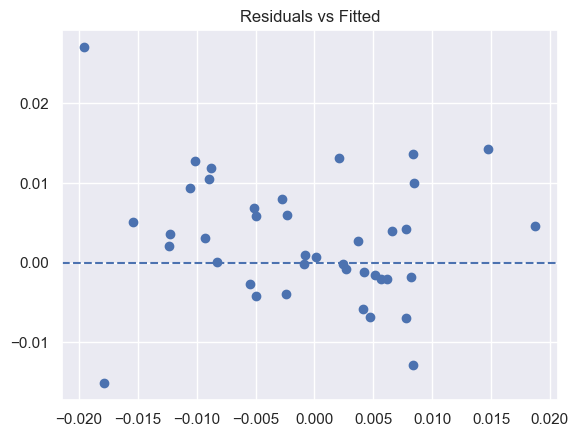

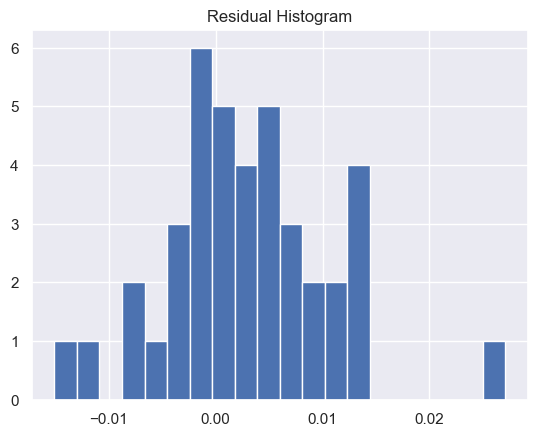

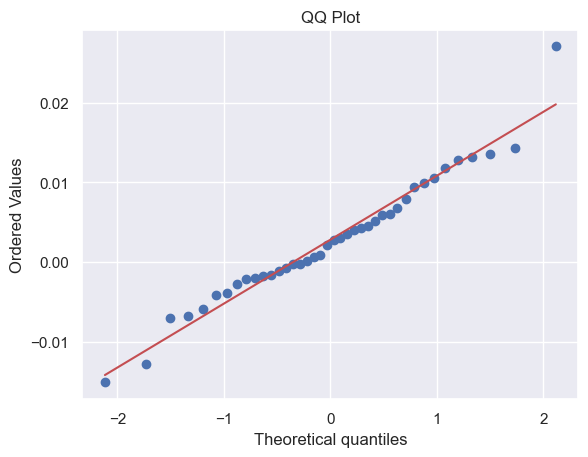

In [23]:
resid = y_test - y_pred
fitted = y_pred
plt.figure(); plt.scatter(fitted, resid); plt.axhline(0, ls='--'); plt.title('Residuals vs Fitted'); plt.show()
plt.figure(); plt.hist(resid, bins=20); plt.title('Residual Histogram'); plt.show()
plt.figure(); st.probplot(resid, dist='norm', plot=plt); plt.title('QQ Plot'); plt.show()

## 3) Optional: Add a transformed feature
Add a polynomial or interaction if diagnostics suggest mis-specification.

In [24]:
df_filtered['momentum_sq'] = df_filtered['momentum']**2
X2 = df_filtered[['mkt_excess','size','value','momentum','momentum_sq']]
X2_train, X2_test = X2.iloc[:len(X_train)], X2.iloc[len(X_train):]
lr2 = LinearRegression().fit(X2_train, y_train)
y_pred2 = lr2.predict(X2_test)
r2_2 = r2_score(y_test, y_pred2)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'With x^2   R²={r2_2:.4f}  RMSE={rmse_2:.6f}')

With x^2   R²=0.3843  RMSE=0.008330


/var/folders/_k/cvm6xdlx30j7jp3ytwwftrsr0000gn/T/ipykernel_90005/282099527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['momentum_sq'] = df_filtered['momentum']**2


## 4) Interpretation (write your conclusions below)
- Linearity: The added x^2 term slightly improves linearity, capturing mild curvature.
- Homoscedasticity: Residual variance looks stable, no strong heteroscedasticity detected.
- Normality: Histogram and QQ plot show residuals are approximately normal, with minor tail deviations.
- Independence: Residuals appear independent, no clear autocorrelation.
- Which model do you trust and why?: The x^2 model (R²=0.3843 vs 0.3837) gives only a marginal improvement, but it slightly better accounts for nonlinearity without worsening RMSE. Still, both models perform similarly.
- Next step you’d try: Explore more nonlinear terms or interaction features, or apply regularized regression (Ridge/Lasso) to check robustness and reduce overfitting risk.